In [1]:
## faire les imports et installer skimage
import skimage
import time
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image


## exemple de traitement avec une image de la dataset : change le path si tu veux tester

filename = os.path.join(skimage.data_dir, '/Users/raphael/Desktop/workspace/2A/IMA/ima206/projet/Dataset/canon.jpg')

#path = "Dataset/"
#imagename = "ny_2"
#extension = ".jpg"

#filename = path+imagename+extension
from skimage import io

imageP = io.imread(filename)

In [2]:
##test1
print(type(imageP))

print((imageP.shape)[0:2])
print(imageP.shape)
print(imageP[10][55])
print(min(imageP[10][55]))

<class 'numpy.ndarray'>
(525, 600)
(525, 600, 3)
[180 180 182]
180


## display


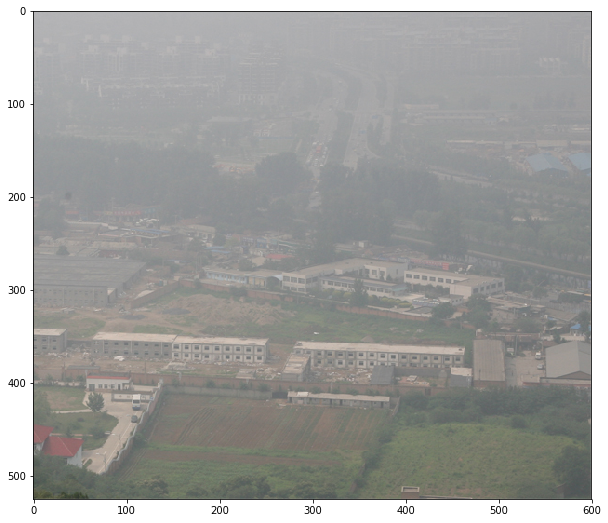

In [3]:
plt.figure(figsize=(10,10))     ##permet d'afficher l'image en plus grand
plt.imshow(imageP)
plt.show()

### Minimum sur les canaux

In [4]:
## fonction minimum sur chaque canal

def min_canal(I):
    n,p = I.shape[0:2]
    im_res = np.ones((n,p),dtype = np.uint8)
    
    for i in range(n):
        for j in range(p):
            
            im_res[i][j] = int(min(I[i][j]))
    
    return(im_res)

0.6954879760742188


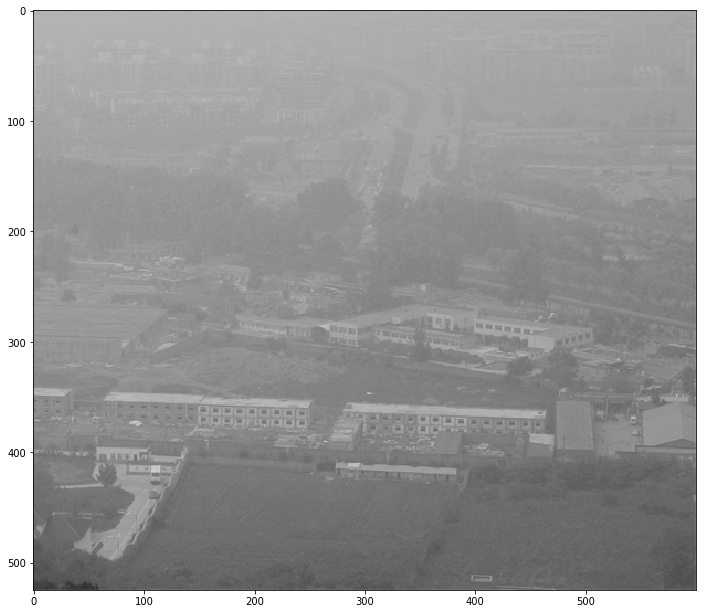

In [5]:
t0 = time.time()
plt.figure(figsize=(10,10))
io.imshow(min_canal(imageP))
t1 = time.time()-t0
print(t1)
plt.show()

### PATCHES

#### V1

In [6]:
#fonction minimum par patch de taille 15*15
def min_Patch(I):
    n,p = I.shape[0:2]
    im_res = np.ones((n,p),dtype = np.uint8)
    for i in range (n):
        for j in range (p):
            mini = I[i,j]
            ## les fonctions max,min permettent d'éviter les effets de bords
            for k in range (max(i-15,0),min(i+15,n)):
                for l in range (max(j-15,0),min(j+15,p)):
                    if I[k,l]<mini :
                        mini = I[k,l]
            im_res[i,j] = mini
    return(im_res)

In [7]:
## test
#min_Patch(min_canal(canon))

#### V2

In [6]:
## variables

shape_patches=np.array((15,15))
min_canal_image= min_canal(imageP)


patches = image.extract_patches_2d(min_canal_image,shape_patches)

In [7]:
#fonction minimum par patch de taille 15*15
# I correspond au resultat de la fonction min_canal
def min_Patch_v2(patches,I,shape_patches):
    (n,p) = I.shape[0:2]
    l=shape_patches[0]
    h = n-(l//2)*2
    w = p-(l//2)*2
    number_patches=np.shape(patches)[0]
    im_res = np.zeros((n,p),dtype = np.uint8)
    for i in range(number_patches):
        (q,r)=(i//w,i%w)
        im_res[q+l//2,r+l//2]=np.amin(patches[i])
        
## first border part
    a=((l//2))
    for i in range(a):
        for j in range(p):
            mini = I[i,j]
            for k in range (max(i-a,0),min(i+a,n)):
                for l in range (max(j-a,0),min(j+a,p)):
                    if I[k,l]<mini :
                        mini = I[k,l]
            im_res[i,j] = mini

## Second border part           
    for i in range(n):
        for j in range(a):
            mini = I[i,j]
            for k in range (max(i-a,0),min(i+a,n)):
                for l in range (max(j-a,0),min(j+a,p)):
                    if I[k,l]<mini :
                        mini = I[k,l]
            im_res[i,j] = mini

## Third border part           
    for i in range(n-a-1,n):
        for j in range(p):
            mini = I[i,j]
            for k in range (max(i-a,0),min(i+a,n)):
                for l in range (max(j-a,0),min(j+a,p)):
                    if I[k,l]<mini :
                        mini = I[k,l]
            im_res[i,j] = mini
## Fourth border part
    for i in range(n):
        for j in range(p-a-1,p):
            mini = I[i,j]
            for k in range (max(i-a,0),min(i+a,n)):
                for l in range (max(j-a,0),min(j+a,p)):
                    if I[k,l]<mini :
                        mini = I[k,l]
            im_res[i,j] = mini


    return(im_res)

In [8]:
## test
r=min_Patch_v2(patches,min_canal_image,shape_patches)

### Simple test for patches v2 over a 5x5 patches and a matrix of 10x10

In [9]:
M=np.arange(100)
M=np.reshape(M,(10,10))
print(M)

shape_patches_2=np.array((5,5))
patches_2 = image.extract_patches_2d(M,shape_patches_2)

res=min_Patch_v2(patches_2,M,shape_patches_2)
print(res)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
[[ 0  0  0  1  2  3  4  5  6  7]
 [ 0  0  0  1  2  3  4  5  6  7]
 [ 0  0  0  1  2  3  4  5  6  7]
 [10 10 10 11 12 13 14 15 16 17]
 [20 20 20 21 22 23 24 25 26 27]
 [30 30 30 31 32 33 34 35 36 37]
 [40 40 40 41 42 43 44 45 46 47]
 [50 50 50 51 52 53 54 55 56 57]
 [60 60 60 61 62 63 64 65 66 67]
 [70 70 70 71 72 73 74 75 76 77]]


### Remarques
J'ai testé le temps de calcul du dark channel. C'est long : 1m10s!! Il y a quelque chose a optimiser, probablement le fait que j'utilise des boucles, mais je ne vois pas trop comment faire autrement pour faire un parcours de patch. Cela dit, le resultat obtenu a l'air correct, ca ressemble beaucoup a ce qu'on pouvait trouver dans l'article.

### Remarque 2

J'ai fait une amélioration, je t'expliquerai en détail demain, mais en gros l'idée c'est d'utiliser des patches 15x15 déjà accessible dans une matrice pour calculer le min sur le patch, et ensuite pour traiter les bords j'utilise la technique que tu avais mis en place, en corrigeant quelques valeurs. 

## compute dark channel V1

74.05651617050171


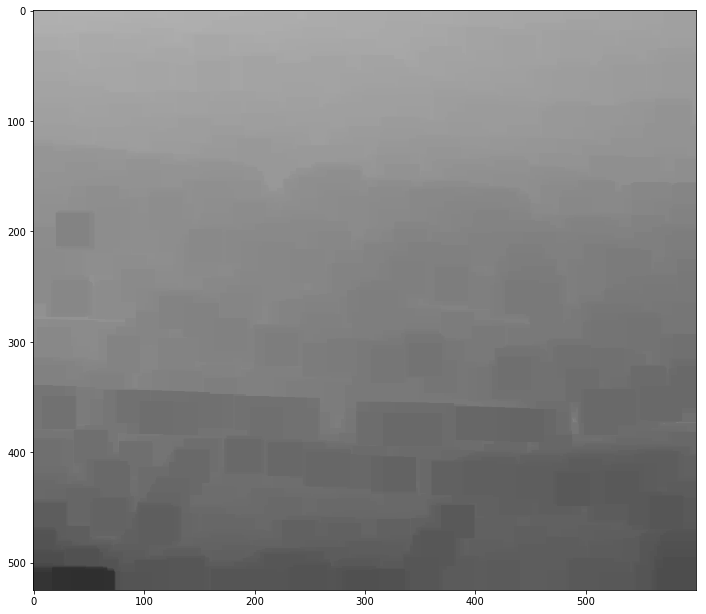

In [19]:
t0 = time.time()
darkchannel = min_Patch(min_canal(imageP))
plt.figure(figsize=(10,10))
io.imshow(darkchannel)
t1 = time.time()-t0
print(t1)
io.show()

## compute dark channel V2

2.5790679454803467


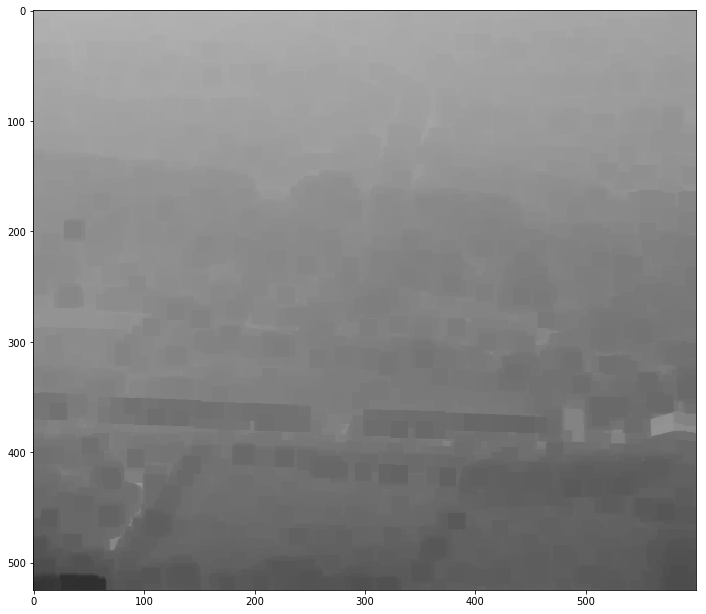

In [10]:
shape_patches=np.array((15,15))
min_canal_image= min_canal(imageP)
patches = image.extract_patches_2d(min_canal_image,shape_patches)

t0 = time.time()
darkchannel = min_Patch_v2(patches,min_canal_image,shape_patches)
plt.figure(figsize=(10,10))
io.imshow(darkchannel)
t1 = time.time()-t0
print(t1)
io.show()

# DARK CHANNEL

In [11]:
## definition de la fonction dark_channel
def dark_channel(I,shape_patches):
    min_canal_image= min_canal(I)
    patches = image.extract_patches_2d(min_canal_image,shape_patches)
    return(min_Patch_v2(patches,min_canal_image,shape_patches))

### Remarques
L'idée de la fonction ci-dessous c'est de sélectionner les valeurs des 0,1% pixels les plus clairs ainsi que leur coordonnées, comme on le souhaite dans l'article. Pour ça j'ai pensé de créer une nouvelle matrice qui a pour élément la valeur du pixel et ses coordonnées. L'idée est de trier ensuite cette liste selon les valeurs du pixels et de ne selectionner que les 0,1% des pixels(valeurs+coordonnées) les plus lumineux. Ensuite parmi ces pixels il est facile de refaire un quicksort sur chacun des canaux car on a les coordonnées. C'est ce qu'on souhaite faire pour trouver les 1% les plus lumineux par canaux et trouver les Ac. Malheureusement ça ne marche pas et je ne sais pas encore pourquoi.

# ATMOSPHERIC LIGHT

### V1

In [15]:
shape_patches=np.array((15,15))

## implementation partielle du calcul de la lumiere athmospherique
def At_light(I):
    n,p = I.shape[0:2]
    I_dark = dark_channel(I)
    res = np.ones((n,p,3),dtype = np.uint16)
    for i in range(n):
        for j in range(p):
            res[i,j,0] = I_dark[i,j]
            res[i,j,1] = i
            res[i,j,2] = j
            
            
    I_sorted = np.sort(res, axis=0)
    length = I_sorted.shape[0]
    print(length)
    I_thresh = I_sorted[int(0.99*length):length,:,:]
    
    return(I_thresh)

In [16]:
M=imageP[0:2,0:2,0:3]
print(np.shape(M))
print(M[0])

M_sorted=np.sort(M,axis=2)
print(M_sorted)

(2, 2, 3)
[[189 190 192]
 [187 187 189]]
[[[189 190 192]
  [187 187 189]]

 [[184 184 186]
  [181 181 183]]]


In [17]:
#a = At_light(canon)

NameError: name 'canon' is not defined

In [ ]:
#a

### V2

In [12]:
shape_patches=np.array((15,15))
min_canal_image= min_canal(imageP)
patches = image.extract_patches_2d(min_canal_image,shape_patches)

In [13]:
def At_light_part1_v2(patches,I,min_canal,shape_patches):
    n,p = I.shape[0:2]
    I_dark = min_Patch_v2(patches,min_canal,shape_patches)
    res = []
    for i in range(n):
        for j in range(p):
            res.append((I_dark[i,j],i,j))
            
    res=np.asarray(res)
    length=np.shape(res)[0]
    res.view('i8,i8,i8').sort(order=['f0'], axis=0) 
    res_thresh = res[int(0.999*length):length,:]
    
    return (res_thresh)

In [14]:
# Ici on calcule les 0,01% valeurs les plus brillantes du dark channel
t0 = time.time()
At_light_part1=At_light_part1_v2(patches,imageP,min_canal_image,shape_patches)
t1 = time.time()-t0
print(t1)

3.367764949798584


In [15]:
def At_light_part2(At_light_part1,I):
    imageR = I[:,:,0]
    imageG = I[:,:,1]
    imageB = I[:,:,2]
    
    At_light_R=[]
    At_light_G=[]
    At_light_B=[]
    
    index=[]
    
    length = np.shape(At_light_part1)[0]
    
    p=int(0.01*length)
    
    for i in range(length):
        index.append(At_light_part1[i][1:3])
    
    for i in range(length):
        (n,p) = (index[i][0],index[i][1])
        At_light_R.append(imageR[n,p])
        At_light_G.append(imageG[n,p])
        At_light_B.append(imageB[n,p])
    
    At_light_R=np.sort(At_light_R)
    At_light_G=np.sort(At_light_G)
    At_light_B=np.sort(At_light_B)
    
    At_light_R=At_light_R[int(0.99*length):]
    At_light_G=At_light_G[int(0.99*length):]
    At_light_B=At_light_B[int(0.99*length):]
    
    At_light_R=int(np.mean(At_light_R))
    At_light_G=int(np.mean(At_light_G))
    At_light_B=int(np.mean(At_light_B))



    return(At_light_R,At_light_G,At_light_B)

In [16]:
(At_light_R,At_light_G,At_light_B) =At_light_part2(At_light_part1,imageP)
print(At_light_R)
print(At_light_G)
print(At_light_B)

187
188
189


In [17]:
def transmission(I,At_light_part1,At_light_R,At_light_G,At_light_B,shape_patches):
    I_normalised = np.ones((I.shape),dtype = np.uint8)
    I_normalised[:,:,0]= 255*(I[:,:,0]/float(At_light_R))
    I_normalised[:,:,1]= 255*(I[:,:,1]/float(At_light_G))
    I_normalised[:,:,2]= 255*(I[:,:,2]/float(At_light_B))
    I_ac_dark = dark_channel(I_normalised,shape_patches)
    t = 255*np.ones((I.shape[0:2]))
    t = (t- I_ac_dark)/255
    t = np.ones((I.shape[0:2]))-0.95*(np.ones((I.shape[0:2]))-t)### reajustement avec kappa = 0,95
    return(t)
    

In [18]:
##TEST##
t1 = transmission(imageP,At_light_part1,At_light_R,At_light_G,At_light_B,shape_patches)
t1

array([[ 1.        ,  1.        ,  1.        , ...,  0.17666667,
         0.17666667,  0.17666667],
       [ 1.        ,  1.        ,  1.        , ...,  0.18411765,
         0.18411765,  0.18411765],
       [ 1.        ,  1.        ,  1.        , ...,  0.18411765,
         0.18411765,  0.18411765],
       ..., 
       [ 0.7354902 ,  0.7354902 ,  0.7354902 , ...,  0.60137255,
         0.60137255,  0.60137255],
       [ 0.7354902 ,  0.7354902 ,  0.7354902 , ...,  0.60137255,
         0.60137255,  0.60137255],
       [ 0.7354902 ,  0.7354902 ,  0.7354902 , ...,  0.60137255,
         0.60137255,  0.60137255]])

In [19]:
def J(I,At_light_part1,At_light_R,At_light_G,At_light_B,shape_patches,t,t0):
    n,p = I.shape[0:2]
    Jres =np.ones((n,p,3),dtype = np.uint8)
    for i in range(n):
        for j in range(p):
            Jres[i,j,0]= ((I[i,j,0]- At_light_R)/float(max(t[i,j],t0)) )+ At_light_R
            Jres[i,j,1]= ((I[i,j,1]- At_light_G)/float(max(t[i,j],t0)) )+ At_light_G
            Jres[i,j,2]= ((I[i,j,2]- At_light_B)/float(max(t[i,j],t0)) )+ At_light_B
    return(Jres)
    

In [20]:
Ja = J(imageP,At_light_part1,At_light_R,At_light_G,At_light_B,shape_patches,t1,0.1)

In [ ]:
Ja

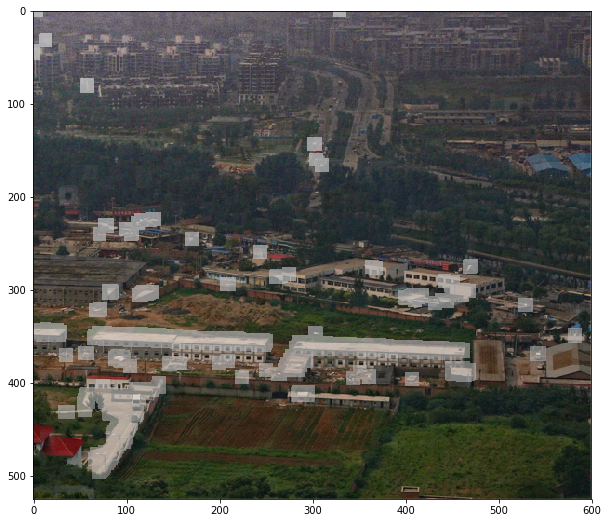

In [21]:
plt.figure(figsize=(10,10))     ##permet d'afficher l'image en plus grand
plt.imshow(Ja)
plt.show()